## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os  
print(os.getcwd())

c:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Model\RNN


## Load data

In [3]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\AMV Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"3,700.0","3,600.0","3,800.0","3,600.0",1.44M,2.78%
1,05/30/2024,"3,600.0","3,600.0","3,800.0","3,500.0",3.23M,2.86%
2,05/29/2024,"3,500.0","3,500.0","3,600.0","3,500.0",522.68K,0.00%
3,05/28/2024,"3,500.0","3,500.0","3,600.0","3,500.0",452.54K,0.00%
4,05/27/2024,"3,500.0","3,500.0","3,600.0","3,500.0",660.47K,0.00%
...,...,...,...,...,...,...,...
1308,03/07/2019,"14,144.0","14,594.0","14,594.0","14,144.0",28.81K,-3.08%
1309,03/06/2019,"14,594.0","14,414.0","14,684.0","14,414.0",17.25K,1.25%
1310,03/05/2019,"14,414.0","14,865.0","15,045.0","14,414.0",48.80K,-3.03%
1311,03/04/2019,"14,865.0","15,180.0","15,180.0","14,865.0",19.01K,-2.36%


## Data preprocessing

In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)
# df['Price'] = df['Price'].fillna(method='ffill')

In [5]:
# Show Dataframe
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,15225.0,15270.0,15315.0,15180.0,4.70K,-0.29%
2019-03-04,14865.0,15180.0,15180.0,14865.0,19.01K,-2.36%
2019-03-05,14414.0,14865.0,15045.0,14414.0,48.80K,-3.03%
2019-03-06,14594.0,14414.0,14684.0,14414.0,17.25K,1.25%
2019-03-07,14144.0,14594.0,14594.0,14144.0,28.81K,-3.08%
...,...,...,...,...,...,...
2024-05-27,3500.0,3500.0,3600.0,3500.0,660.47K,0.00%
2024-05-28,3500.0,3500.0,3600.0,3500.0,452.54K,0.00%
2024-05-29,3500.0,3500.0,3600.0,3500.0,522.68K,0.00%


## Scale Data

In [6]:
# Select 'Price' column
data = df['Price'].values

In [7]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

## Model 7 : 3

In [8]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

## Create and add data into X, y

In [9]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [10]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [11]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Build Model

In [12]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.6723
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4441
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3373
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2921
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2347
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2006
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1674
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1746
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1347
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1306
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1099
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1013
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1005
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0912
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - lo

## Predict Close price in test and validation set

In [14]:
# Make predictions
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


## Transform data back to the original

In [15]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

## Calculate the error of the model

In [16]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.32073217245679003
RMSE on Test set: 1276.1985978136006
MSLE on Test set: 0.08012405728604088


## Predict Close price for 90 next days

In [17]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [18]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [19]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[ 4970.577   5219.0757  5604.7153  6081.384   6627.137   7124.7314
  7639.7183  8150.225   8586.933   9060.865   9623.227  10137.217
 10760.33   11412.167  12030.001  12695.494  13318.92   14062.403
 14867.72   15535.166  16191.303  16935.27   17611.89   18248.465
 18946.527  19540.268  20112.58   20638.812  21041.209  21502.895 ]

Predicted next 60 days:
[ 4970.577   5219.0757  5604.7153  6081.384   6627.137   7124.7314
  7639.7183  8150.225   8586.933   9060.865   9623.227  10137.217
 10760.33   11412.167  12030.001  12695.494  13318.92   14062.403
 14867.72   15535.166  16191.303  16935.27   17611.89   18248.465
 18946.527  19540.268  20112.58   20638.812  21041.209  21502.895
 22058.111  22383.16   22692.822  22986.998  23238.277  23444.564
 23628.852  23771.56   23886.574  23996.963  24086.521  24157.4
 24222.805  24272.945  24310.857  24341.16   24359.006  24384.69
 24405.916  24408.584  24410.287  24414.295  24408.377  24403.74
 24399.959  24393.262  2438

## Model visualization

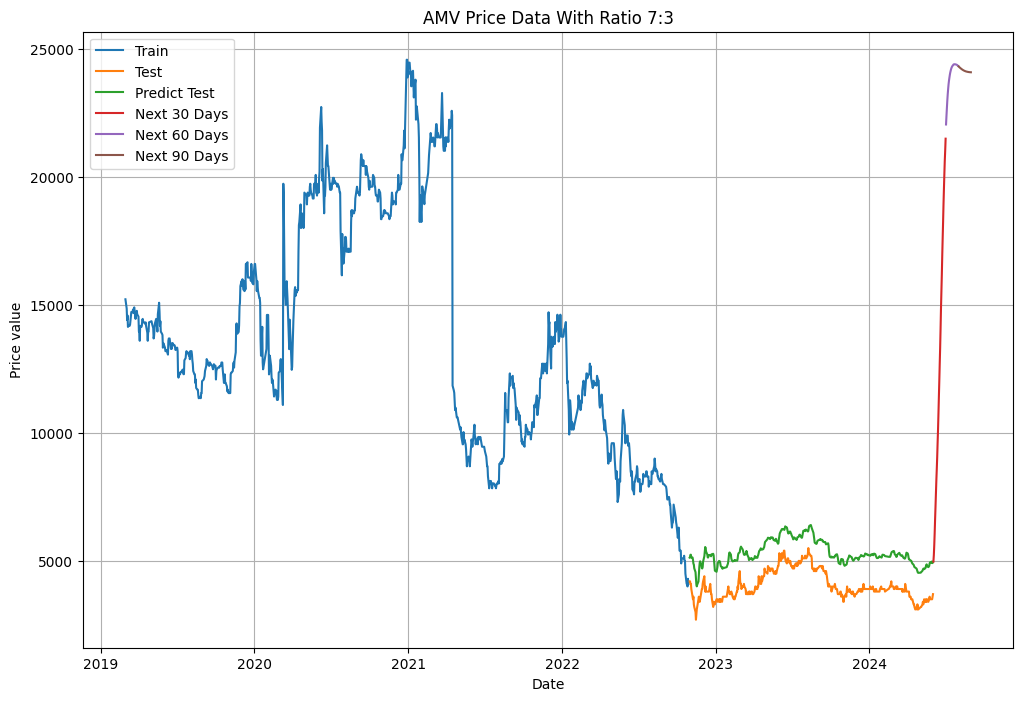

In [20]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("AMV Price Data With Ratio 7:3")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_73_AMV.png')
plt.show()

## Model 8 : 2

In [21]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\AMV Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"3,700.0","3,600.0","3,800.0","3,600.0",1.44M,2.78%
1,05/30/2024,"3,600.0","3,600.0","3,800.0","3,500.0",3.23M,2.86%
2,05/29/2024,"3,500.0","3,500.0","3,600.0","3,500.0",522.68K,0.00%
3,05/28/2024,"3,500.0","3,500.0","3,600.0","3,500.0",452.54K,0.00%
4,05/27/2024,"3,500.0","3,500.0","3,600.0","3,500.0",660.47K,0.00%
...,...,...,...,...,...,...,...
1308,03/07/2019,"14,144.0","14,594.0","14,594.0","14,144.0",28.81K,-3.08%
1309,03/06/2019,"14,594.0","14,414.0","14,684.0","14,414.0",17.25K,1.25%
1310,03/05/2019,"14,414.0","14,865.0","15,045.0","14,414.0",48.80K,-3.03%
1311,03/04/2019,"14,865.0","15,180.0","15,180.0","14,865.0",19.01K,-2.36%


In [22]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)

In [23]:
# Select 'Close' column
data = df['Price'].values

In [24]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [25]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [26]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [27]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [28]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [29]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5708
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3700
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2769
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2152
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1944
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1582
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1352
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1295
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1051
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0881
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0893
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0814
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0672
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0627
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - lo

In [31]:
# Make predictions
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [32]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

In [33]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.02648002474613441
RMSE on Test set: 135.78481813270457
MSLE on Test set: 0.0011088834500643941


In [34]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [35]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [36]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[3690.1975 3718.3528 3771.0186 3802.496  3836.6487 3870.708  3896.9539
 3934.5715 3966.9656 4006.4724 4025.1555 4060.067  4086.0442 4104.8896
 4131.7915 4149.093  4172.1553 4192.3267 4214.021  4224.5454 4239.822
 4252.197  4266.9214 4281.531  4293.7417 4305.8647 4317.432  4329.708
 4340.317  4350.2407]

Predicted next 60 days:
[3690.1975 3718.3528 3771.0186 3802.496  3836.6487 3870.708  3896.9539
 3934.5715 3966.9656 4006.4724 4025.1555 4060.067  4086.0442 4104.8896
 4131.7915 4149.093  4172.1553 4192.3267 4214.021  4224.5454 4239.822
 4252.197  4266.9214 4281.531  4293.7417 4305.8647 4317.432  4329.708
 4340.317  4350.2407 4360.969  4370.155  4380.2524 4389.4834 4398.923
 4407.4824 4416.7407 4425.002  4433.1294 4441.1904 4448.6714 4456.5557
 4463.726  4470.95   4477.4863 4484.0684 4490.374  4496.4033 4502.2817
 4507.8623 4513.295  4518.4834 4523.5303 4528.2993 4532.9087 4537.3633
 4541.573  4545.7124 4549.597  4553.414 ]

Predicted next 90 days:
[3690.1975 3718

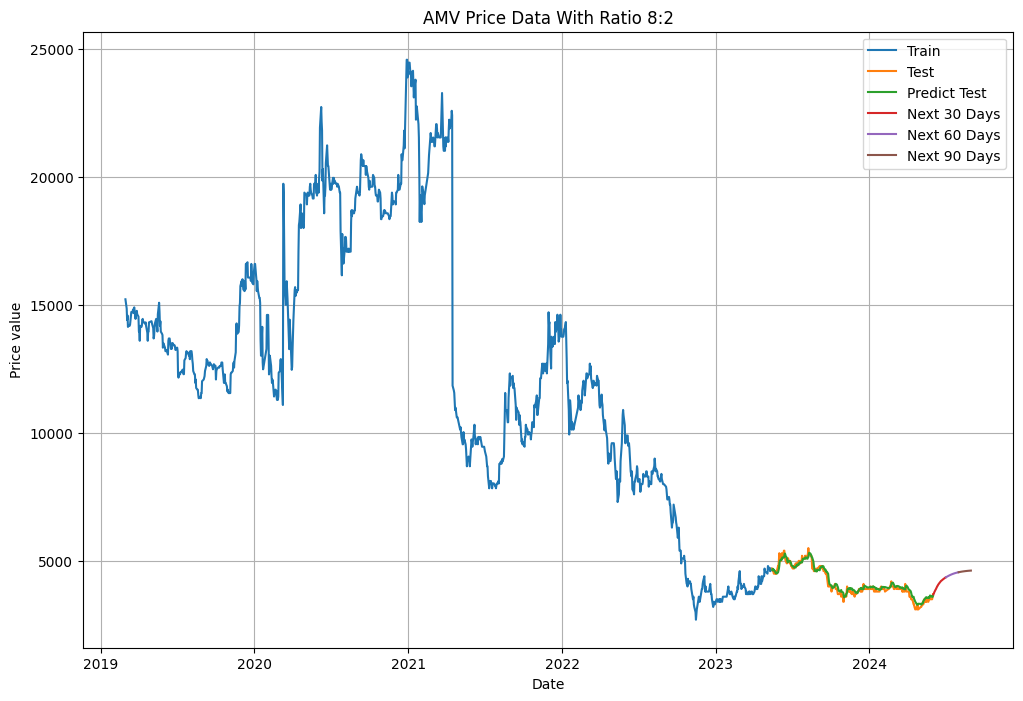

In [37]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("AMV Price Data With Ratio 8:2")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_82_AMV.png')
plt.show()

## Model 9 : 1

In [38]:
data = pd.read_csv(r'C:\Users\trieu\OneDrive\Documents\HK2_2024\IS403\IS403_BA\IS403_O22_HTCL_2\Dataset\AMV Historical Data.csv')
df = data.copy()
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"3,700.0","3,600.0","3,800.0","3,600.0",1.44M,2.78%
1,05/30/2024,"3,600.0","3,600.0","3,800.0","3,500.0",3.23M,2.86%
2,05/29/2024,"3,500.0","3,500.0","3,600.0","3,500.0",522.68K,0.00%
3,05/28/2024,"3,500.0","3,500.0","3,600.0","3,500.0",452.54K,0.00%
4,05/27/2024,"3,500.0","3,500.0","3,600.0","3,500.0",660.47K,0.00%
...,...,...,...,...,...,...,...
1308,03/07/2019,"14,144.0","14,594.0","14,594.0","14,144.0",28.81K,-3.08%
1309,03/06/2019,"14,594.0","14,414.0","14,684.0","14,414.0",17.25K,1.25%
1310,03/05/2019,"14,414.0","14,865.0","15,045.0","14,414.0",48.80K,-3.03%
1311,03/04/2019,"14,865.0","15,180.0","15,180.0","14,865.0",19.01K,-2.36%


In [39]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by date in ascending order
df = df.sort_values('Date')

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df = df.replace(',', '', regex=True)

In [40]:
# Select 'Close' column
data = df['Price'].values

In [41]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

In [42]:
# Define the size of train and test set
train_size = int(len(data_scaled) * 0.9)
test_size = len(data_scaled) - train_size

# Split the data into train and test sets
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [43]:
# Function to prepare data for RNN
def add_data(data, sequence_length=30):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [44]:
# Prepare sequences
sequence_length = 30
train_last_windowsize = train_data[-sequence_length:]
test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

In [45]:
# Reshape data for RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [46]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.5450
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2915
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2061
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1555
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.1445
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1051
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1022
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0837
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0849
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0742
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0579
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0575
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0533
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - lo

In [48]:
# Make predictions
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step


In [49]:
# Inverse transform the predictions and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

In [50]:
# Calculate error metrics
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test set: {test_mape}")
print(f"RMSE on Test set: {test_rmse}")
print(f"MSLE on Test set: {test_msle}")

MAPE on Test set: 0.06653810982886592
RMSE on Test set: 264.5476290816232
MSLE on Test set: 0.005469099877548419


In [51]:
# Predict next 30, 60, and 90 days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
y_next_30_days = []
y_next_60_days = []
y_next_90_days = []

for i in range(90):
    next_day_pred = model.predict(last_sequence_days)
    if i < 30:
        y_next_30_days.append(next_day_pred[0][0])
    if i < 60:
        y_next_60_days.append(next_day_pred[0][0])
    y_next_90_days.append(next_day_pred[0][0])
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━

In [52]:
# Inverse transform the predictions
y_next_30_days = scaler.inverse_transform(np.array(y_next_30_days).reshape(-1, 1)).flatten()
y_next_60_days = scaler.inverse_transform(np.array(y_next_60_days).reshape(-1, 1)).flatten()
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1)).flatten()

In [53]:
# Print the predicted values
print("Predicted next 30 days:")
print(y_next_30_days)
print("\nPredicted next 60 days:")
print(y_next_60_days)
print("\nPredicted next 90 days:")
print(y_next_90_days)

Predicted next 30 days:
[ 3380.763     3316.8748    3188.3223    3101.3604    2976.21
  2867.8486    2734.53      2584.6748    2423.777     2287.0417
  2114.0825    1945.3285    1768.8577    1594.4824    1417.4962
  1227.6748    1038.6044     856.5556     671.73016    489.91333
   304.8834     126.31037    -50.451103  -219.88417   -386.8429
  -542.90485   -702.34985   -850.0762    -985.2906   -1110.5378  ]

Predicted next 60 days:
[ 3380.763     3316.8748    3188.3223    3101.3604    2976.21
  2867.8486    2734.53      2584.6748    2423.777     2287.0417
  2114.0825    1945.3285    1768.8577    1594.4824    1417.4962
  1227.6748    1038.6044     856.5556     671.73016    489.91333
   304.8834     126.31037    -50.451103  -219.88417   -386.8429
  -542.90485   -702.34985   -850.0762    -985.2906   -1110.5378
 -1243.6393   -1361.9607   -1476.9009   -1582.6803   -1684.757
 -1777.5514   -1866.2107   -1949.9056   -2028.7896   -2100.6992
 -2170.166    -2234.9978   -2296.7415   -2354.1326   -2

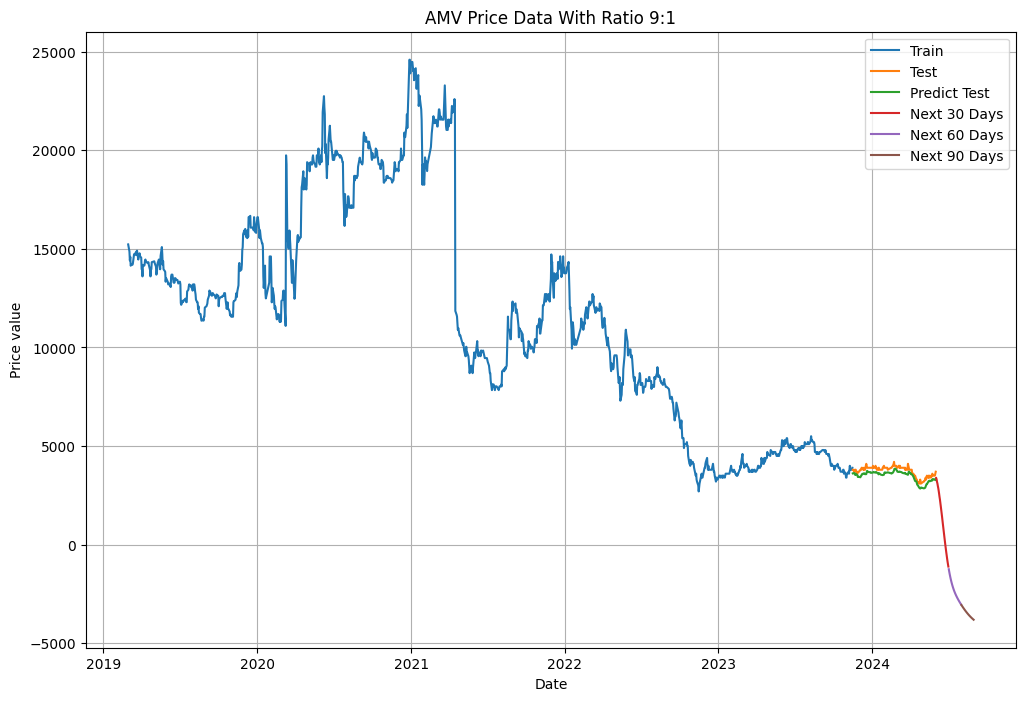

In [54]:
# Create DataFrames for plotting
train_data_df = pd.DataFrame(train_data, index=df.index[:train_size], columns=['Price'])
test_data_df = pd.DataFrame(test_data, index=df.index[train_size:], columns=['Price'])
y_pred_df = pd.DataFrame(y_pred, index=df.index[train_size:], columns=['Predict Test'])
next_30_days_df = pd.DataFrame(y_next_30_days, index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=1), periods=30), columns=['Next 30 Days'])
next_60_days_df = pd.DataFrame(y_next_60_days[30:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=31), periods=30), columns=['Next 60 Days'])
next_90_days_df = pd.DataFrame(y_next_90_days[60:], index=pd.date_range(start=df.index[-1] + pd.DateOffset(days=61), periods=30), columns=['Next 90 Days'])
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(train_data_df.index, train_data_df['Price'], label='Train')
plt.plot(test_data_df.index, test_data_df['Price'], label='Test')
plt.plot(y_pred_df.index, y_pred_df['Predict Test'], label='Predict Test')
plt.plot(next_30_days_df.index, next_30_days_df['Next 30 Days'], label='Next 30 Days')
plt.plot(next_60_days_df.index, next_60_days_df['Next 60 Days'], label='Next 60 Days')
plt.plot(next_90_days_df.index, next_90_days_df['Next 90 Days'], label='Next 90 Days')
plt.legend()
plt.grid()
plt.title("AMV Price Data With Ratio 9:1")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.savefig('RNN_91_AMV.png')
plt.show()